                                    Welcome to Machine Learning Challenge!

In [53]:
import numpy as np
import pandas as pd
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as FF
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plot

In [54]:
input_path = "C:\\Users\\Varma\\ML Challenge\\data\\ml1data.train.txt"
output_path = "C:\\Users\\Varma\\ML Challenge\\data\\challengeDataset.csv"

# input_path = "/home/ankur/MachineLearning/challenge/ml-Challenge/data/ml1data.train.txt"
# output_path = "/home/ankur/MachineLearning/challenge/ml-Challenge/data/challengeDataset.csv"


In [55]:
with open('C:\\Users\\Varma\\ML Challenge\\data\\ml1data.train.txt', 'r') as original: data = original.read()
with open('C:\\Users\\Varma\\ML Challenge\\data\\ml1data.train.txt', 'w') as modified: modified.write("1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22\n" + data)
dataset = pd.read_csv(input_path)
print(dataset)

     1     2  3      4  5       6  7   8   9  10  ...   13      14  15  16  \
0    1     2  3   4.00  5    6.00  7   8   9  10  ...   13   14.00  15  16   
1    A   138  E  35.91  J    7.79  P  AA  88  AF  ...   CQ  177.27  NK  DF   
2    A   966  E  35.91  V   22.63  Q  AD  88  AF  ...   DC  171.97  NK  DF   
3    C   345  E  35.91  J   12.19  Q  AA  88  AF  ...   DC  121.70  NK  DF   
4    B   276  F  35.91  O    5.61  T  AC  44  BA  ...   CQ   60.85  NK  DG   
5    C   552  G  35.91  L   27.67  T  AB  44  AF  ...   DA   92.60  NK  DF   
6    B   161  F  35.91  J   17.17  Q  AB  44  AF  ...   CQ   92.60  NK  DF   
7    A   345  H  71.81  M    6.33  Q  AA  88  AF  ...   DC   87.31  NK  DG   
8    B   460  F  35.91  N   43.12  P  AD  22  AG  ...   CQ  158.75  NK  DF   
9    C   414  E  35.91  N   25.67  Q  AC  66  AF  ...   DC   71.44  NK  DF   
10   B  1242  H  35.91  O  106.30  Q  AE  66  AF  ...   DB  153.45  NK  DG   
11   C   483  F  35.91  O   10.48  S  AA  88  BA  ...   CQ   95.

In [56]:
headers = ["X1", "X2", "X3", "X4", "X5",
               "X6", "X7", "X8", "X9", "X10",
               "X11","X12","X13","X14", "X15", "X16", "X17", "X18",
               "X19", "X20", "X21","Y"]

In [57]:
dataset.columns = headers
print(dataset)

    X1    X2 X3     X4 X5      X6 X7  X8  X9 X10  ...  X13     X14 X15  X16  \
0    1     2  3   4.00  5    6.00  7   8   9  10  ...   13   14.00  15   16   
1    A   138  E  35.91  J    7.79  P  AA  88  AF  ...   CQ  177.27  NK   DF   
2    A   966  E  35.91  V   22.63  Q  AD  88  AF  ...   DC  171.97  NK   DF   
3    C   345  E  35.91  J   12.19  Q  AA  88  AF  ...   DC  121.70  NK   DF   
4    B   276  F  35.91  O    5.61  T  AC  44  BA  ...   CQ   60.85  NK   DG   
5    C   552  G  35.91  L   27.67  T  AB  44  AF  ...   DA   92.60  NK   DF   
6    B   161  F  35.91  J   17.17  Q  AB  44  AF  ...   CQ   92.60  NK   DF   
7    A   345  H  71.81  M    6.33  Q  AA  88  AF  ...   DC   87.31  NK   DG   
8    B   460  F  35.91  N   43.12  P  AD  22  AG  ...   CQ  158.75  NK   DF   
9    C   414  E  35.91  N   25.67  Q  AC  66  AF  ...   DC   71.44  NK   DF   
10   B  1242  H  35.91  O  106.30  Q  AE  66  AF  ...   DB  153.45  NK   DG   
11   C   483  F  35.91  O   10.48  S  AA  88  BA  ..

In [58]:
dataset.to_csv(output_path, index=False)
print(dataset.describe())

                X2          X4          X6          X9         X12  \
count   504.000000  504.000000  504.000000  504.000000  504.000000   
mean    473.603175   41.188948   21.748710   65.886905   45.103175   
std     284.492861   12.894578   18.912836   24.041819   17.699650   
min       2.000000    4.000000    1.670000    9.000000   12.000000   
25%     276.000000   35.910000    9.025000   44.000000   32.000000   
50%     414.000000   35.910000   15.445000   66.000000   48.000000   
75%     552.000000   35.910000   26.462500   88.000000   64.000000   
max    1380.000000   71.810000  106.300000   88.000000   64.000000   

              X14            X17         X19  
count  504.000000     504.000000  504.000000  
mean    94.881409   74906.968254   82.391230  
std     30.604884   30695.763337   25.734172  
min     14.000000      17.000000   19.000000  
25%     71.440000   54321.000000   71.810000  
50%     89.960000   54321.000000   71.810000  
75%    109.140000  108642.000000   71.81

In [59]:
def split_dataset(dataset, train_percentage, feature_headers, target_header):
    """
    Split the dataset with train_percentage
    :param dataset:
    :param train_percentage:
    :param feature_headers:
    :param target_header:
    :return: train_x, test_x, train_y, test_y
    """

    # Split dataset into train and test dataset
    train_x, test_x, train_y, test_y = train_test_split(dataset[feature_headers], dataset[target_header],
                                                        train_size=train_percentage)
    return train_x, test_x, train_y, test_y

In [60]:
print(headers[0:])

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'Y']


In [61]:
train_x, test_x, train_y, test_y = split_dataset(dataset, 0.7, headers[0:-1], headers[21])

C:\Users\Varma\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



In [62]:
print ("Train_x Shape :: ", train_x.shape)
print(train_x)

Train_x Shape ::  (352, 21)
    X1    X2 X3     X4 X5     X6 X7  X8  X9 X10 ... X12  X13     X14  X15 X16  \
460  C   483  G  71.81  O  17.20  R  AE  88  AF ...  32   CQ  108.48   DE  DF   
384  A   552  G  71.81  M   8.89  Q  AD  88  AF ...  32   CQ  113.77   NK  DS   
197  C   276  G  35.91  N  10.02  Q  AB  88  BF ...  64   CQ  108.48   NK  DG   
273  C   552  E  35.91  X  42.09  Q  AD  88  AF ...  32   DB   71.44   DE  DF   
366  A   138  I  35.91  K   7.99  Q  AA  88  BA ...  64   DB   92.60   NK  DS   
172  B   138  F  35.91  M  97.03  P  AD  22  AF ...  32   DA   60.85   NK  DF   
420  D   414  F  35.91  L  20.33  Q  AE  22  BA ...  16   DA  119.06   DD  DF   
89   A   552  F  71.81  J  13.25  Q  AB  44  AF ...  64   CQ   55.56   NK  DG   
185  C   138  F  35.91  U   8.92  R  AB  22  AG ...  64   CQ  164.04   NK  DF   
33   A   552  F  35.91  L  20.14  Q  AB  44  AG ...  32   CQ   63.50   NK  DG   
310  B   483  F  71.81  O   7.92  Q  AA  44  BA ...  64   DA  103.18   NK  DF   


In [63]:
    print ("Train_y Shape :: ", train_y.shape)
    print(train_y)
    print ("Test_x Shape :: ", test_x.shape)
    print ("Test_y Shape :: ", test_y.shape)

Train_y Shape ::  (352,)
460    NMEM
384    NMEM
197     MEM
273     MEM
366    NMEM
172    NMEM
420     MEM
89     NMEM
185     MEM
33      MEM
310    NMEM
205     MEM
161    NMEM
243     MEM
409     MEM
309     MEM
195     MEM
350     MEM
437    NMEM
48     NMEM
118     MEM
326    NMEM
435     MEM
201     MEM
336     MEM
20     NMEM
67      MEM
419     MEM
101     MEM
478     MEM
       ... 
363    NMEM
246     MEM
55      MEM
131     MEM
404    NMEM
91      MEM
380     MEM
9       MEM
383    NMEM
493    NMEM
35      MEM
58      MEM
37      MEM
421    NMEM
262     MEM
261     MEM
83     NMEM
446    NMEM
338    NMEM
168     MEM
109     MEM
341     MEM
374     MEM
44      MEM
167    NMEM
471    NMEM
14      MEM
96      MEM
490    NMEM
240     MEM
Name: Y, Length: 352, dtype: object
Test_x Shape ::  (152, 21)
Test_y Shape ::  (152,)


In [64]:
def random_forest_classifier(features, target):
    """
    To train the random forest classifier with features and target data
    :param features:
    :param target:
    :return: trained random forest classifier
    """
    clf = RandomForestClassifier()
    clf.fit(features, target)
    return clf

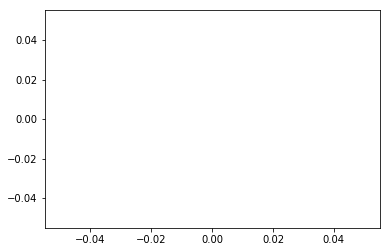

In [65]:
data = np.genfromtxt(output_path, delimiter=',', skip_header=10,
                     skip_footer=10, names=['x', 'y', 'z'])
plot.plot(data['x'], data['y'], color='r', label='the data')
plot.show()

In [66]:
#Plot CSV
df = pd.read_csv(output_path)

sample_data_table = FF.create_table(df.head())
py.iplot(sample_data_table, filename='sample-data-table')

trace1 = go.Scatter(
                    x=df['x'], y=df['logx'], # Data
                    mode='lines', name='logx' # Additional options
                   )
trace2 = go.Scatter(x=df['x'], y=df['sinx'], mode='lines', name='sinx' )
trace3 = go.Scatter(x=df['x'], y=df['cosx'], mode='lines', name='cosx')

layout = go.Layout(title='Simple Plot from csv data',
                   plot_bgcolor='rgb(230, 230,230)')

fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)

# Plot data in the notebook
py.iplot(fig, filename='simple-plot-from-csv')

KeyError: 'x'

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(train_x, train_y)

ValueError: could not convert string to float: 'DT'

In [68]:
from sklearn.metrics import accuracy_score
predicted = rf.predict(test_x)
accuracy = accuracy_score(test_y, predicted)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [70]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)

ValueError: could not convert string to float: 'DT'